# Session 7 exercises

These are sample answers for the in-class exercises in Session 7 of PHAS0030.  You should make sure that you can do these yourself! The further work exercises will be in a separate notebook.

Most of these exercises use the same integration technique: the velocity Verlet integrator.  The main difference between the sections is the interaction between particles, and the number of particles.  The most important section to understand is the Lennard-Jones section, which contains all the important ideas.

In [6]:
# We always start with appropriate imports; note the use of the IPython magic
# command to set up Matplotlib within the notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 4. Small particles

### 1. Single particle, no box

#### Question 1a

In [7]:
Nstep = 200
# Storage
r = np.zeros([Nstep,3])
v = np.zeros([Nstep,3])
a = np.zeros([Nstep,3])
# t=0
r[0] = np.array([1.0,0.0,0.0])
v[0] = np.array([0.0,1.0,0.1])
a[0] = np.array([-1.0,0.0,0.0])
# Timestep
dt = 0.1

#### Question 1b

In [8]:
# Velocity Verlet algorithm
for i in range(1,Nstep):
    t = i*dt
    # Update r
    r[i] = r[i-1] + dt*v[i-1] + 0.5*dt*dt*a[i-1]
    # Set the acceleration: doesn't depend on r[i] in this case
    # but will in general, so the order is important
    a[i] = np.array([-np.cos(t),-np.sin(t),0.0])
    v[i] = v[i-1] + 0.5*dt*(a[i] + a[i-1])

#### Question 1c

Given the acceleration, the circular motion in $x$ and $y$ shouldn't surprise you; the initial velocity along $z$ gives us the helical path.

Text(0.5, 0, 'z')

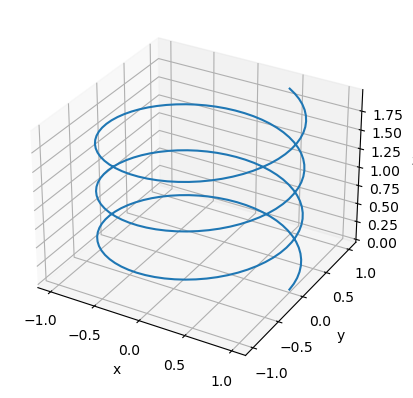

In [9]:
fig_3d1 = plt.figure()
ax3d1 = fig_3d1.add_subplot(111,projection='3d')
ax3d1.plot(r[:,0],r[:,1],r[:,2])
ax3d1.set_xlabel('x')
ax3d1.set_ylabel('y')
ax3d1.set_zlabel('z')

### 2. Single particle, open boundaries

#### Question 2a

In [10]:
boxlen = 10.0
Nstep = 200
# Storage
rbox = np.zeros([Nstep,3])
vbox = np.zeros([Nstep,3])
# t=0
rng = np.random.default_rng()
rbox[0] = boxlen*rng.random(3)
vbox[0] = rng.random(3)
# Timestep
dt = 0.1
a = np.zeros(3)

#### Question 2b

Text(0.5, 0, 'z')

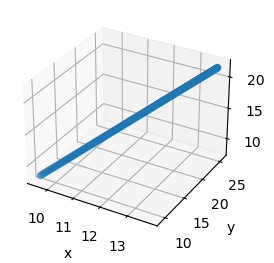

In [11]:
# Velocity Verlet algorithm
for i in range(1,Nstep):
    t = i*dt
    rbox[i] = rbox[i-1] + dt*vbox[i-1] + 0.5*dt*dt*a
    vbox[i] = vbox[i-1] + 0.5*dt*(a + a)
fig_3d2 = plt.figure(figsize=(10,3))
ax3d2a = fig_3d2.add_subplot(121,projection='3d')
ax3d2a.scatter(rbox[:,0],rbox[:,1],rbox[:,2])
ax3d2a.set_xlabel('x')
ax3d2a.set_ylabel('y')
ax3d2a.set_zlabel('z')

# Question 2c

Looking carefully at the axes, we can see that the particle has left the box (though it is not Elvis...)

### 3. Single particle, periodic boundaries

This function imposes periodic boundaries using the numpy `np.mod` function, which is equivalent to the modulo operator (`%`).

In [12]:
def pbc(r,boxlen):
    """Implements periodic boundary conditions for a particle"""
    rout = np.mod(r,boxlen)
    return rout

#### Question 3a

In [13]:
boxlen = 10.0
Nsteps = 20
# Storage
rbox3 = np.zeros([Nsteps,3])
vbox3 = np.zeros([Nsteps,3])
# t=0
rbox3[0] = boxlen*rng.random(3)
vbox3[0] = 5*rng.random(3)
# Timestep
dt = 0.1
a = np.zeros(3)

#### Question 3b

In [14]:
# Velocity Verlet algorithm
for i in range(1,Nsteps):
    t = i*dt
    rbox3[i] = rbox3[i-1] + dt*vbox3[i-1] + 0.5*dt*dt*a
    rbox3[i] = pbc(rbox3[i],boxlen)
    vbox3[i] = vbox3[i-1] + 0.5*dt*(a + a)

#### Question 3c

I found that I had to play around with the `view_init` parameters to view the trajectory.

Text(0.5, 0, 'z')

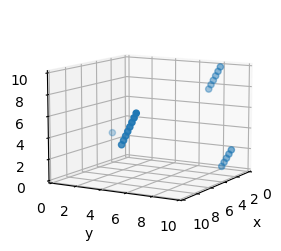

In [15]:
fig_3d4 = plt.figure(figsize=(10,3))
ax3d4a = fig_3d4.add_subplot(121,projection='3d')
ax3d4a.scatter(rbox3[:,0],rbox3[:,1],rbox3[:,2])
ax3d4a.set_xlim(0,10)
ax3d4a.set_ylim(0,10)
ax3d4a.set_zlim(0,10)
ax3d4a.view_init(10,30)
ax3d4a.set_xlabel('x')
ax3d4a.set_ylabel('y')
ax3d4a.set_zlabel('z')

Here is another way to visualise the trajectory, but plotting it projected into the $x-y$, $x-z$ and $y-z$ planes.  This requires a little work to understand, but gives a good insight.

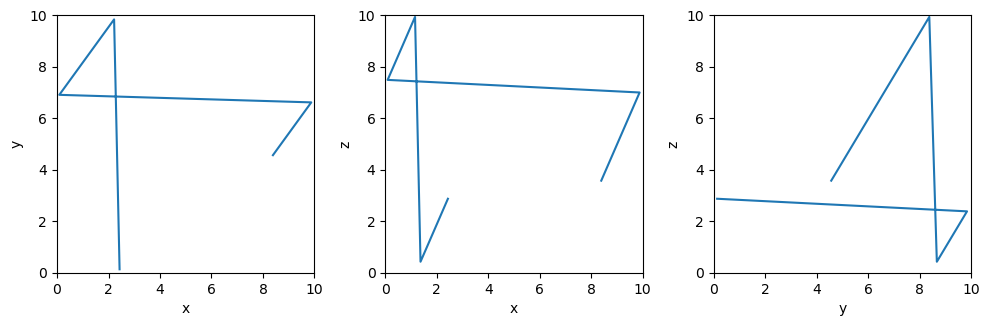

In [16]:
fig3alt = plt.figure(figsize=(10,4),tight_layout=True)
ax3alt1 = fig3alt.add_subplot(1,3,1)
ax3alt1.plot(rbox3[:,0],rbox3[:,1])
ax3alt1.set_xlabel('x')
ax3alt1.set_ylabel('y')
ax3alt1.set_xlim(0,10)
ax3alt1.set_ylim(0,10)
ax3alt1.set_aspect('equal')
ax3alt2 = fig3alt.add_subplot(1,3,2)
ax3alt2.plot(rbox3[:,0],rbox3[:,2])
ax3alt2.set_xlabel('x')
ax3alt2.set_ylabel('z')
ax3alt2.set_xlim(0,10)
ax3alt2.set_ylim(0,10)
ax3alt2.set_aspect('equal')
ax3alt3 = fig3alt.add_subplot(1,3,3)
ax3alt3.plot(rbox3[:,1],rbox3[:,2])
ax3alt3.set_xlabel('y')
ax3alt3.set_ylabel('z')
ax3alt3.set_xlim(0,10)
ax3alt3.set_ylim(0,10)
ax3alt3.set_aspect('equal')

And now we calculate and plot the kinetic energy

Text(0.5, 1.0, 'Test of conservation of energy')

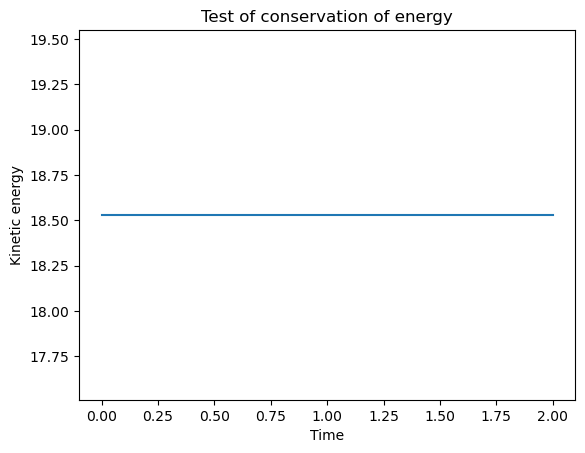

In [17]:
ke2 = 0.5*np.sum(vbox3*vbox3,axis=1)
plt.plot(np.linspace(0,dt*Nsteps,Nsteps),ke2)
plt.xlabel('Time')
plt.ylabel('Kinetic energy')
plt.title('Test of conservation of energy')

The kinetic energy is perfectly conserved (as we would expect - there is no acceleration, so this is very simple motion).

## 5. The Lennard-Jones potential

### Question 1

In [18]:
def find_energy_LJ(pos,Npart,sigma,epsilon):
    """Evaluate the energy due to Lennard-Jones potential
    
    Inputs:
    pos             Positions (Npart x 3 array)
    Npart           Number of particles
    sigma, epsilon  LJ parameters
    
    Output:
    energy
    """
    energy = 0.0
    for i in range(N-1):
        for j in range(i+1,N):
            rij = pos[j]-pos[i]
            rij2 = np.sum(rij*rij)
            # These lines are likely to be more efficient computationally than a power
            sigma2_rij2 = sigma*sigma/rij2
            sigma6_rij6 = sigma2_rij2*sigma2_rij2*sigma2_rij2
            sigma12_rij12 = sigma6_rij6*sigma6_rij6
            energy+= 4.0*epsilon*(sigma12_rij12 - sigma6_rij6)
    return energy

### Question 2

In [19]:
def find_forces_LJ(pos,Npart,sigma,epsilon,boxlen):
    """Evaluate the force due to Lennard-Jones potential
    
    Inputs:
    pos             Positions (Npart x 3 array)
    Npart           Number of particles
    sigma, epsilon  LJ parameters
    boxlen          Length of simulation cell
    
    Output:
    energy          LJ energy
    force           Forces on particles (Npart x 3 array)
    """
    force = np.zeros((Npart,3))
    energy = 0.0
    sigma6 = sigma**6
    sigma12 = sigma6*sigma6
    for i in range(Npart-1):
        for j in range(i+1,Npart):
            dr = pos[j]-pos[i]
            # Ensure that we interact with the closest particle through periodic boundaries
            # For larger arrays, using np.mod(dr,boxlen) is likely to be more efficient
            dr -= boxlen*np.rint(dr/boxlen)
            dr2 = np.sum(dr*dr)
            dr2i = 1.0/dr2
            dr6i = dr2i*dr2i*dr2i
            fij= 24.0*epsilon*dr*dr2i*dr6i*(sigma6 - 2.0*sigma12*dr6i)
            force[i] += fij
            force[j] -= fij
            energy += 4.0*epsilon*dr6i*(sigma12*dr6i - sigma6)
    return energy, force

### Question 3

In [20]:
# Initialisation
Nsteps = 5000
kB = 1.38e-23         # J/K
sigma = 0.275e-9      # 0.275nm
epsilon = 36*kB       # 36kT
mass = 20.2*1.673e-27 # kg

### Question 4

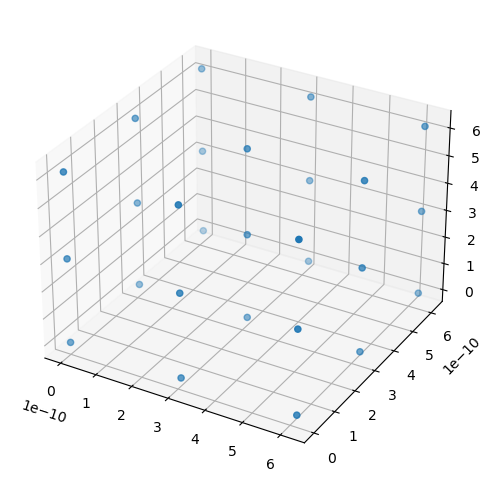

In [21]:
Ncells = 3
boxlen = Ncells*2**(1/6)*sigma
Npart = Ncells*Ncells*Ncells
rbox3 = np.zeros([Nsteps,Npart,3])
vbox3 = np.zeros([Nsteps,Npart,3])
count = 0
for i in range(Ncells):
    for j in range(Ncells):
        for k in range(Ncells):
            rbox3[0,count] = (1.0/Ncells)*boxlen*np.array([i,j,k])
            count += 1
fig_3d5 = plt.figure(figsize=(10,6))
ax3d5 = fig_3d5.add_subplot(111,projection='3d')
ax3d5.scatter(rbox3[0,:,0],rbox3[0,:,1],rbox3[0,:,2])

### Question 5

In [17]:
# Initialise velocities
initT  = 300          # K
# Either set the width here
# vsig = np.sqrt(kB*initT/mass)
# vbox3[0] = rng.normal(scale=vsig, size=(Npart,3))
# Or draw from a standard normal and rescale
vbox3[0] = rng.standard_normal(size=(Npart,3))
v_scale = np.sqrt(3*Npart*kB*initT/(mass*np.sum(vbox3[0]*vbox3[0])))
vbox3[0] *= v_scale

# Initial conditions
energy = np.zeros(Nsteps)
temp = np.zeros(Nsteps)
e, f = find_forces_LJ(rbox3[0],Npart,sigma,epsilon,boxlen)
energy[0] = e
temp[0] = mass*np.sum(vbox3[0]*vbox3[0])/(3*Npart*kB)
acc = f/mass
print("Potential energy and temperature are ",e,"J ",temp[0],"K")
dt = 1e-15 # s 

Potential energy and temperature are  -6.300447499999996e-20 J  300.0 K


### Question 6

In [18]:
for step in range(1,Nsteps):
    rbox3[step] = rbox3[step-1] + dt*vbox3[step-1] + 0.5*dt*dt*acc # acc at step-1
    rbox3[step] = pbc(rbox3[step],boxlen)
    energy[step], f = find_forces_LJ(rbox3[step],Npart,sigma,epsilon,boxlen)
    acc_next = f/mass
    vbox3[step] = vbox3[step-1] + 0.5*dt*(acc_next + acc)
    temp[step] = mass*np.sum(vbox3[step]*vbox3[step])/(3*Npart*kB)
    acc = acc_next

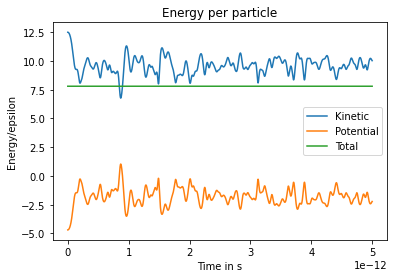

In [19]:
timeaxis = np.linspace(0,Nsteps*dt - dt,Nsteps)
ke = 0.5*mass*np.sum(vbox3*vbox3,axis=(1,2))
plt.plot(timeaxis,ke/(Npart*epsilon),label='Kinetic')
plt.plot(timeaxis,energy/(Npart*epsilon),label='Potential')
plt.plot(timeaxis,(ke+energy)/(Npart*epsilon),label='Total')
plt.title("Energy per particle")
plt.xlabel("Time in s")
plt.ylabel("Energy/epsilon")
plt.legend()

We see that, while the PE and KE fluctuate, the total energy is very well conserved over time.  If you plot just the total energy, it changes by no more than $4\times 10^{-4}$ reduced units over the 5ps run.

Since the kinetic energy fluctuates, we expect that the temperature will also fluctuate (and drop initially).  We can check this by plotting the temperature.

Text(0, 0.5, 'Temperature (K)')

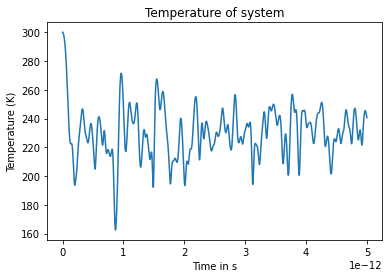

In [20]:
plt.plot(timeaxis,temp)
plt.title("Temperature of system")
plt.xlabel("Time in s")
plt.ylabel("Temperature (K)")

## 6. Inverse quadratic

### Question 1

In [21]:
def find_force_elec(pos,q1,q2):
    """Evaluate the electrostatic force between two objects
    
    Inputs:
    pos    Position (Ndim array)
    q1, q2 Charges of two objects
    
    Econst 1/4pi epsilon0 or equivalent defined externally
    
    Output:
    force on q1, oriented along pos
    """
    dr2 = np.dot(pos,pos)
    dri3 = 1.0/(np.sqrt(dr2)*dr2)
    # Econst is 1/(4pi epsilon0)
    f1 = Econst*q1*q2*pos*dri3 
    return f1

### Question 2

In [22]:
from scipy import constants
q1 =  2*constants.e # Alpha particle
q2 = 79*constants.e # Gold nucleus
Econst  = 1/(4*np.pi*constants.epsilon_0) # 
m1 = 4*constants.m_p

In [23]:
# Starting velocity and position
v0 = 1e7      # m/s
l0 = 1000e-15 # m
b = 40e-15    # m
x0 = l0
y0 = b
r0 = np.sqrt(x0**2 + y0**2)

# Time: steps and total
dt = 1e-23 # s
total_time = 2*l0/v0
Nsteps = int(total_time/dt)
print(f"Total time: {total_time}")

# Initial positions and velocities
Ndim = 2
pos = np.zeros((Nsteps,Ndim))
pos[0] = np.array([x0,y0])
vel = np.zeros((Nsteps,Ndim))
vel[0] = np.array([-v0,0.0])
acc = find_force_elec(pos[0],q1,q2)/m1

Total time: 2e-19


### Question 3

In [24]:
for step in range(1,Nsteps):
    pos[step] = pos[step-1] + dt*vel[step-1] + 0.5*dt*dt*acc
    acc_next = find_force_elec(pos[step],q1,q2)/m1
    vel[step] = vel[step-1] + 0.5*dt*(acc+acc_next)
    acc = acc_next

Text(0.5, 1.0, 'Rutherford scattering')

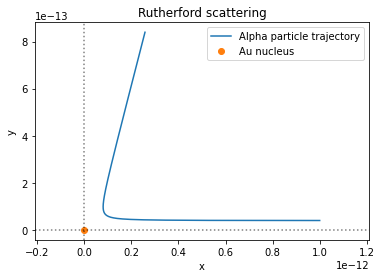

In [25]:
plt.axis('equal')
plt.plot(pos[:,0],pos[:,1],label='Alpha particle trajectory')
plt.plot(0,0,'o',label='Au nucleus')
plt.axhline(c='k',ls=':',alpha = 0.5)
plt.axvline(c='k',ls=':',alpha = 0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Rutherford scattering")

We can calculate the angle of deflection and closest approach point quite easily.  It is possible that the final speed will be larger than the initial speed depending on the distance travelled: the initial potential energy is not zero, and will eventually be converted into kinetic energy.

In [26]:
v1 = np.sqrt(np.dot(vel[-1],vel[-1]))
print(f"Final speed {v1}")
angle = 180*np.arccos(np.dot(vel[0],vel[-1])/(v1*v0))/np.pi
print(f"Angle of deflection {angle}")
dr_arr = np.linalg.norm(pos,axis=1)
print(f"Closest approach is {np.min(dr_arr)}m")

Final speed 9923817.912531126
Angle of deflection 104.44697313478838
Closest approach is 1.1123817234004212e-13m


Text(0.5, 1.0, 'Energy conservation')

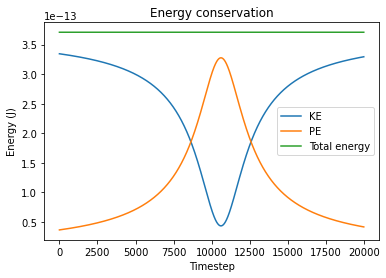

In [27]:
# Find energy at each step
ke = 0.5*m1*np.linalg.norm(vel,axis=1)**2
pe = Econst*q1*q2/np.linalg.norm(pos,axis=1)
plt.plot(ke,label='KE')
plt.plot(pe,label='PE')
plt.plot(ke+pe,label='Total energy')
plt.legend()
plt.xlabel("Timestep")
plt.ylabel("Energy (J)")
plt.title("Energy conservation")

If you plot just the total energy, you will find that the deviation is around 1e-20J (in a quantity with a magnitude of 1e-13J).  The kinetic energy drops as the potential energy rises (the repulsive force slows the alpha particle down as it comes closer to the Au nucleus).

## 7. Coarse graining

### Question 1

In [28]:
def int_force(pos,N):
    """Generic interaction force; exclude ends"""
    force = np.zeros_like(pos)
    for i in range(1,N-1):
        for j in (-1,1):
            dr = pos[i+j]-pos[i]
            dri2 = 1.0/np.sum(dr*dr)
            dri4 = dri2*dri2
            dri6 = dri4*dri2
            force[i] += Dconst*(2.0*dri4 - 4.0*dri6)*dr
    return force

### Question 2

In [29]:
Nsteps_ch = 3000
dt = 1e-3
Dconst = 1e4
Nchain = 20
pos_chain = np.zeros((Nsteps_ch,Nchain,2))
pos_chain[0,:,0] = np.sqrt(2)*np.linspace(0,Nchain-1,Nchain)
# Implicit mass of 1kg assumed for each link

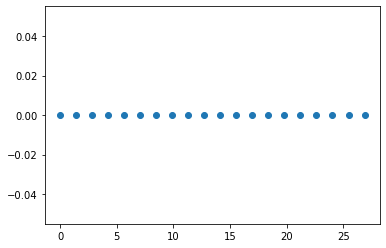

In [30]:
plt.plot(pos_chain[0,:,0],pos_chain[0,:,1],'o')

In [31]:
vel_chain = np.zeros((Nsteps_ch,Nchain,2))
acc_chain = int_force(pos_chain[0],Nchain) + np.array([0.0,-9.8])

### Question 3

In [32]:
for step in range(1,Nsteps_ch):
    pos_chain[step] = pos_chain[step-1] + dt*vel_chain[step-1] + 0.5*dt*dt*acc_chain
    pos_chain[step,0] = np.sqrt(2)*np.array([0.0,0.0])
    pos_chain[step,-1] = np.sqrt(2)*np.array([Nchain-1,0.0])
    acc_next = int_force(pos_chain[step],Nchain) + np.array([0.0,-9.8])
    vel_chain[step] = vel_chain[step-1] + 0.5*dt*(acc_chain+acc_next)
    vel_chain[step,0]  = np.zeros(2)
    vel_chain[step,-1] = np.zeros(2)
    acc_chain = acc_next

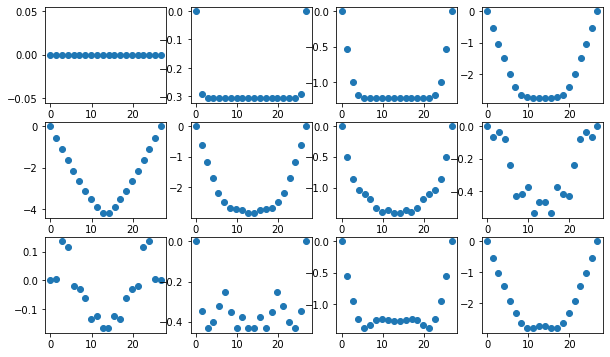

In [33]:
figS5Q4 = plt.figure(figsize=(10,6))
index = 1
for i in range(0,Nsteps_ch,250):
    ax = figS5Q4.add_subplot(3,4,index)
    ax.plot(pos_chain[i,:,0],pos_chain[i,:,1],'o')
    index += 1

The chain oscillates in a somewhat uncontrolled fashion, though the shape that it will take at equilibrium can be seen from time to time.  Note that the axes on different graphs are rather different.